# Misophonia Data Analysis Outline
## 1. Introduction
- Brief introduction to Misophonia
- Objective of the analysis

## 2. Description of Data
- Overview of the dataset
- Description of each feature/variable
- Summary statistics

## 3. Exploratory Data Analysis (EDA)
- Data cleaning and preprocessing
    - Handling missing values
    - Data transformation
- Visualizations
    - Histograms
    - Box plots
    - Scatter plots
    - Pair plots

## 4. Correlation Analysis
- Correlation matrix
- Heatmap of correlations
- Discussion of significant correlations

## 5. Plotting
- Distribution plots
- Bar charts
- Line plots
- Custom visualizations relevant to Misophonia

## 6. Linear Regression
- Model building
- Assumptions check
- Model evaluation
    - R-squared
    - Mean Squared Error (MSE)
- Interpretation of results

## 7. Machine Learning
- Data splitting (train/test)
- Model selection
    - Decision Trees
    - Random Forest
    - Support Vector Machines
    - Neural Networks
- Model training and evaluation
    - Accuracy
    - Precision, Recall, F1-Score
    - ROC-AUC
- Hyperparameter tuning
- Model comparison

## 8. Conclusion
- Summary of findings
- Implications of the results
- Recommendations for future research

## 9. References
- List of references and sources used in the analysis

First, the angle of the jaw and anxiety

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
df = pd.read_excel('https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2024/raw/master/datasets/misophonia_data.xlsx')
df

,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,...,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
0,si,4.0,divorciado,2.0,99.0,1.0,99.0,1.0,no,0.0,...,44.0,III,7.97,13.0,89.6,1.5,1.0,21.0,14.0,0.0
1,si,2.0,casado,1.0,75.0,1.0,75.0,1.0,no,0.0,...,43.0,II,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,0.0
2,no,0.0,divorciado,2.0,77.0,1.0,55.0,0.0,no,0.0,...,24.0,I,12.27,11.5,101.4,5.0,NaN,NaN,NaN,-22.0
3,si,3.0,casado,1.0,95.0,1.0,99.0,1.0,no,0.0,...,33.0,III,7.81,16.8,75.3,2.7,1.0,NaN,NaN,4.0
4,no,0.0,casado,1.0,30.0,0.0,40.0,0.0,no,0.0,...,41.0,I,9.81,33.0,105.5,6.0,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,12.0,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN


Correlation: -0.36266540270933073


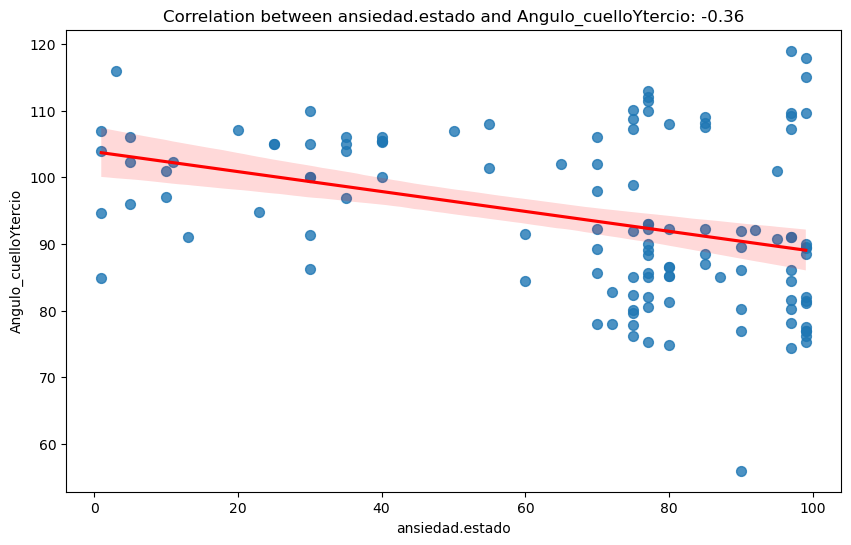

In [7]:
# Calculate the correlation
correlation = df['ansiedad.estado'].corr(df['Angulo_cuelloYtercio'])
print(f"Correlation: {correlation}")

# Plot the data
plt.figure(figsize=(10, 6))
sns.regplot(x='ansiedad.estado', y='Angulo_cuelloYtercio', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title(f'Correlation between ansiedad.estado and Angulo_cuelloYtercio: {correlation:.2f}')
plt.xlabel('ansiedad.estado')
plt.ylabel('Angulo_cuelloYtercio')
plt.show()

ANOVA F-statistic: 0.6801448948991973
ANOVA p-value: 0.5658744225892609


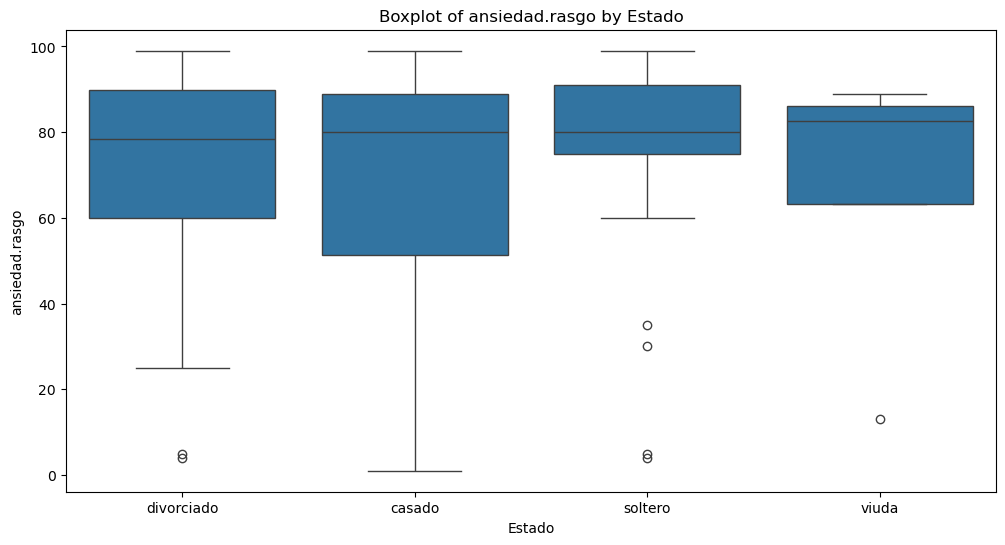

In [10]:
from scipy.stats import f_oneway

# Perform ANOVA test
estado_groups = [group['ansiedad.rasgo'].values for name, group in df.groupby('Estado')]
anova_result = f_oneway(*estado_groups)

# Output the statistics
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA p-value: {anova_result.pvalue}")

# Plot the results
plt.figure(figsize=(12, 6))
sns.boxplot(x='Estado', y='ansiedad.rasgo', data=df)
plt.title('Boxplot of ansiedad.rasgo by Estado')
plt.xlabel('Estado')
plt.ylabel('ansiedad.rasgo')
plt.show()